### PCA vs Clustering 

#### Principal Components Analysis 
- PCA is an example of an unsupervised learning model that can be used for dimensionality reduction, regularization, etc.
- PCA learns an optimal rotation of the data in high-dimensional space to identify latent variables that have important properties: 
    * the latent variables are uncorrelated
    * the latent variables are orthogonal
    * the latent variables are ordered by the amount of variance accounted for. 
- The first property can be useful in further analysis (e.g., classifiers) especially when the number of observations is smaller than the number of variables. 
- The second property makes intepreting the latent variables challenging. 
- The third property is useful for selecting latent variables.


#### Clustering Algorithms 
- Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.
- The important point here is that the labels are not known in advance.  We are trying to learn
    * What are the statistically meaningful subsets of the data, that we can assign labels to. 
    * How many such such labels are optimal to model the data. 
    * properties that define each cluster to develop an interpretation of each cluster.


In [119]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

First we are going to revisit the hitters data.  This is an example of data that we want to model with PCA. 

In [120]:
df = pd.read_csv('../data/Hitters.csv', index_col=0)
df.index.name = 'Player'
#Lets preemptively get rid of garbage. 
df=df.dropna()
y = df.Salary
#Lets drop all the non playing stats variables 
df = df.drop(['Salary','League', 'Division', 'NewLeague'], axis=1).astype('float64')
ss = StandardScaler()
X = ss.fit_transform(df)
df.info()
variables = list(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AtBat    263 non-null    float64
 1   Hits     263 non-null    float64
 2   HmRun    263 non-null    float64
 3   Runs     263 non-null    float64
 4   RBI      263 non-null    float64
 5   Walks    263 non-null    float64
 6   Years    263 non-null    float64
 7   CAtBat   263 non-null    float64
 8   CHits    263 non-null    float64
 9   CHmRun   263 non-null    float64
 10  CRuns    263 non-null    float64
 11  CRBI     263 non-null    float64
 12  CWalks   263 non-null    float64
 13  PutOuts  263 non-null    float64
 14  Assists  263 non-null    float64
 15  Errors   263 non-null    float64
dtypes: float64(16)
memory usage: 34.9+ KB


<Axes: >

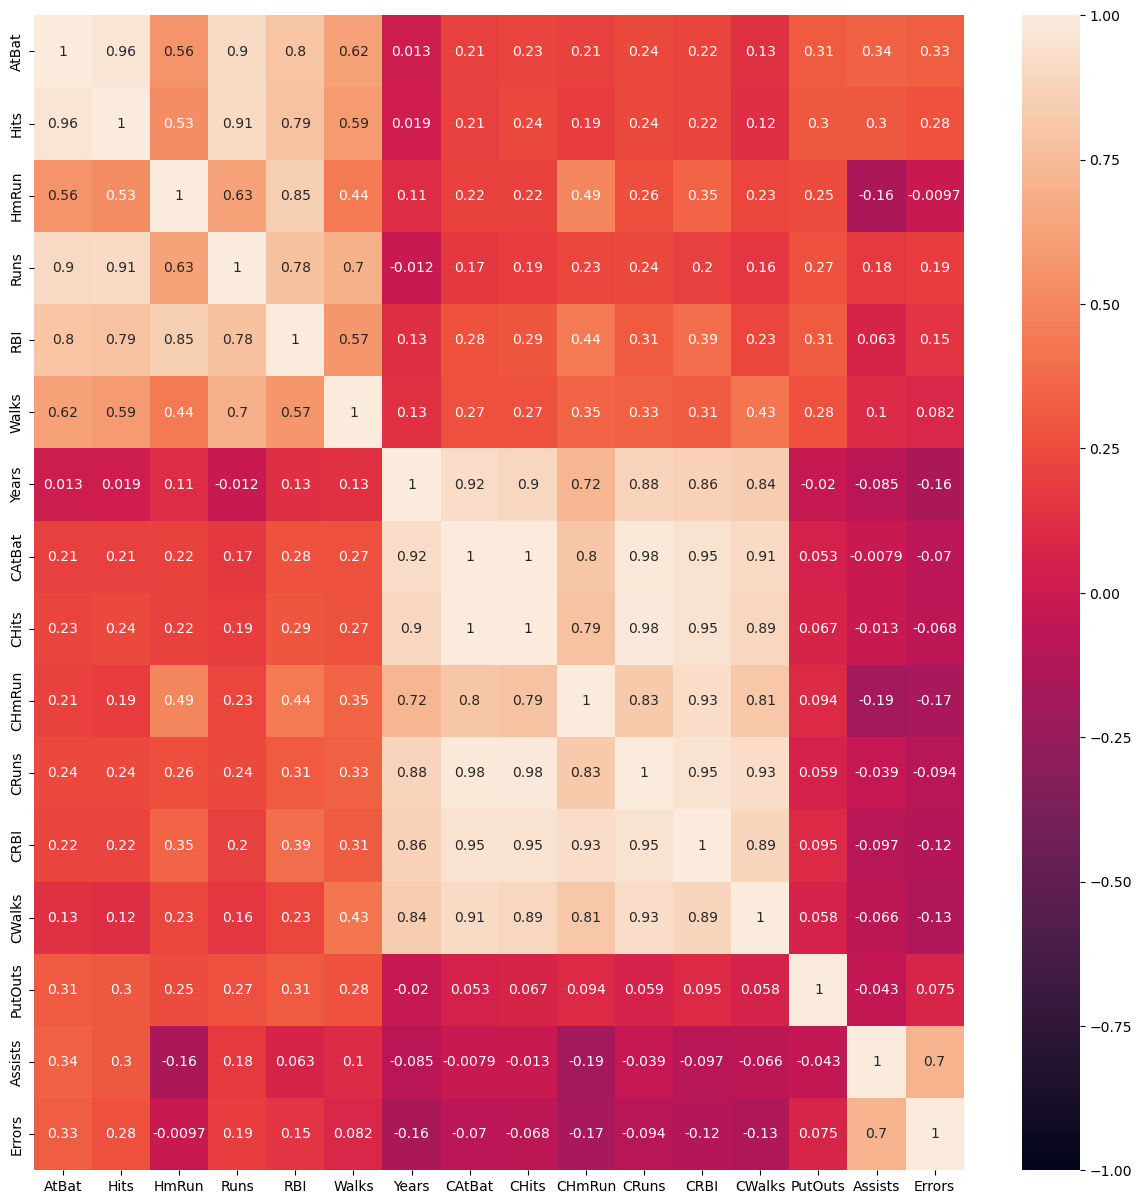

In [121]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [122]:
pca = PCA(n_components = 14) #decide of number of components. ALWAYS smaller than the number of observations
                             #if you dont specify it, it will give you min(nsamples,nfeatures)-1
pca.fit(X) #fit the model
eigenvector = pca.components_ #get the eigenvectors - components
latent = pca.explained_variance_ #get the eigenvalues - 
#normalized as explained variance
score = pca.transform(X) # get the score, 
#"coordinate" of each face in the new pc coordinate system 
#%%

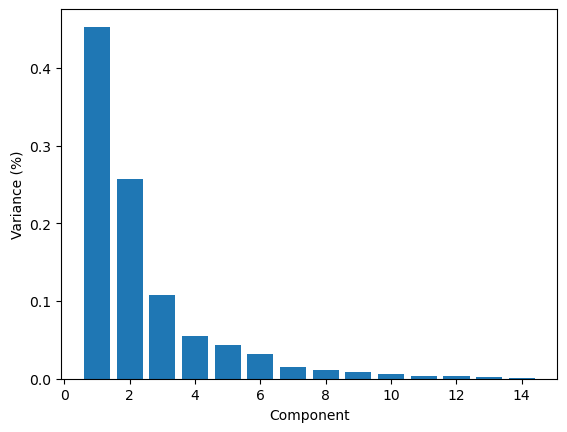

In [123]:
prct_latent = pca.explained_variance_ratio_
plt.figure()
plt.bar(range(1,prct_latent.size+1),prct_latent)
plt.xlabel('Component')
plt.ylabel("Variance (%)")
plt.show()

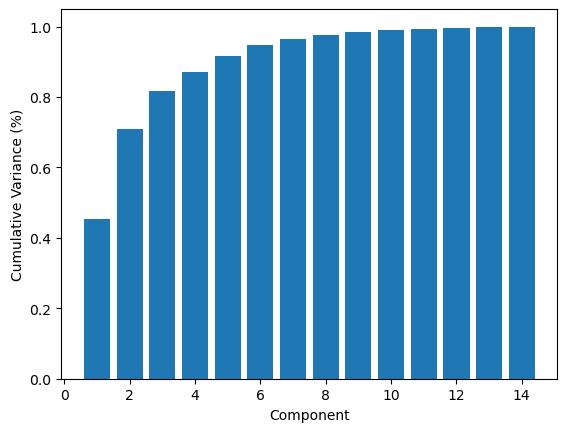

In [124]:
cum_latent = np.cumsum(prct_latent)
plt.figure()
plt.bar(range(1,len(cum_latent)+1),cum_latent)
plt.xlabel('Component')
plt.ylabel("Cumulative Variance (%)")
plt.show()

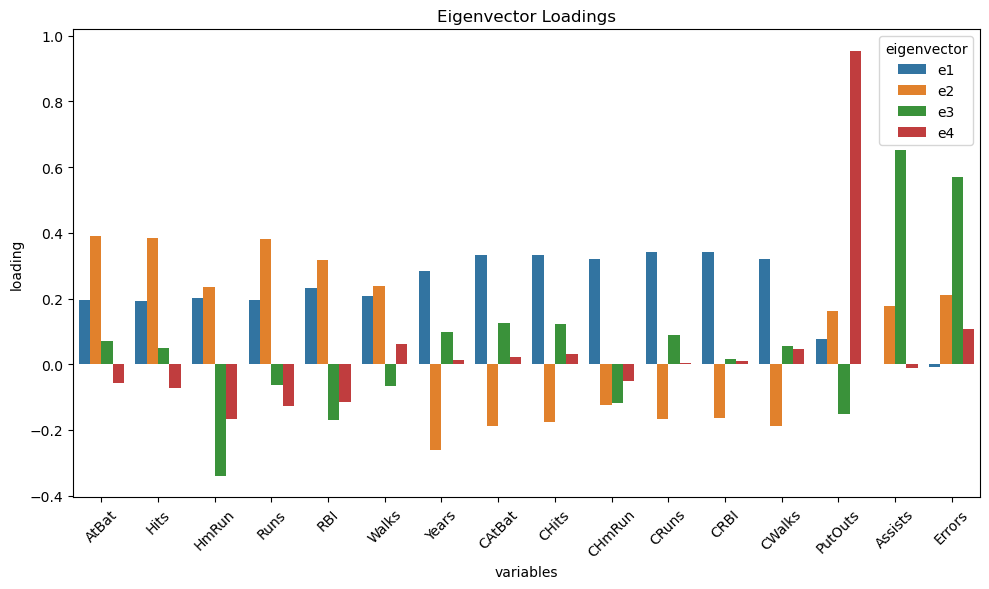

In [125]:
dfeig = pd.DataFrame({'variables':variables,
                    'e1':eigenvector[0,:],
                    'e2':eigenvector[1,:],
                    'e3':eigenvector[2,:],
                    'e4':eigenvector[3,:]})
df_long = dfeig.melt(id_vars='variables',
                     value_vars=['e1', 'e2', 'e3','e4'],
                     var_name='eigenvector',
                     value_name='loading')
dfeig.info

plt.figure(figsize=(10,6))
sns.barplot(data=df_long, x='variables', y='loading', hue='eigenvector')
plt.xticks(rotation=45)
plt.title('Eigenvector Loadings')
plt.tight_layout()
plt.show()

In [126]:
df = pd.read_csv('cleaned_mental_disorder_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 16  Optimisi

I did a different encoding than in your homework. 
I wanted to make all the values between 0 and 1. 

In [127]:
df = df.rename(columns={'Anorxia': 'Anorexia', 'Expert Diagnose':'Expert Diagnosis', 'Sleep dissorder':'Sleep disorder'})

encoder = {'Seldom':0.25, 'Sometimes':0.5, 'Usually':0.75, 'Most-Often':1}
for j in df.columns[0:4]:
    df[j] = df[j].map(encoder)
encoder = {'YES':1, 'NO':0}
for j in df.columns[4:14]:
    df[j] = df[j].map(encoder)  

encoder = {'1 From 10': .1, '2 From 10': .2, '3 From 10':.3, '4 From 10': .4, '5 From 10':.5, '6 From 10': .6, '7 From 10':.7, '8 From 10':.8, '9 From 10':.9, '10 From 10':1.0 }
for j in df.columns[14:17]:
    df[j] = df[j].map(encoder)
    
df.head(5)

,Sadness,Euphoric,Exhausted,Sleep disorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnosis
0,0.75,0.25,0.50,0.5,1,1,0,0,1,0,0,1,1,1,0.3,0.3,0.4,Bipolar Type-2
1,0.75,0.25,0.75,0.5,0,1,0,0,0,0,0,0,0,0,0.4,0.2,0.5,Depression
2,0.50,1.00,0.50,0.5,1,0,0,0,1,1,0,1,1,0,0.6,0.5,0.7,Bipolar Type-1
3,0.75,0.25,0.75,1.0,1,1,1,0,1,0,0,0,0,0,0.3,0.2,0.2,Bipolar Type-2
4,0.75,0.75,0.50,0.5,0,0,0,0,0,0,0,1,1,1,0.5,0.5,0.6,Normal


In [128]:
from sklearn.mixture import GaussianMixture
X = df.drop('Expert Diagnosis', axis=1)
y = df['Expert Diagnosis']
gmm = GaussianMixture(n_components=4).fit(X)

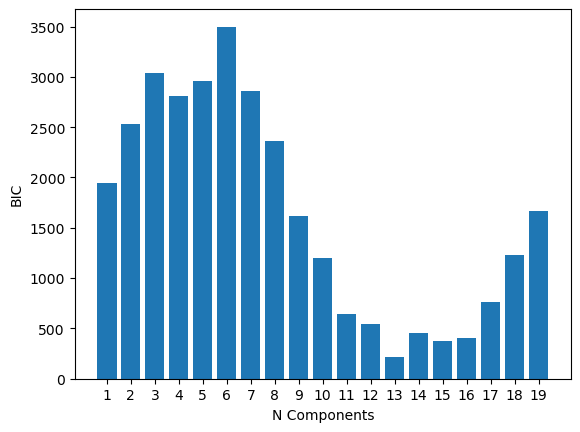

In [129]:
n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
bics = [model.fit(X).bic(X) for model in models]
plt.bar(n_components, bics);
plt.xticks(n_components)
plt.xlabel('N Components')
plt.ylabel('BIC')
plt.show()

In [130]:
gmm = GaussianMixture(n_components=13).fit(X)

In [131]:
print(gmm.weights_)

[0.05833333 0.08333333 0.05       0.16666667 0.08333333 0.09166667
 0.04166667 0.08333333 0.05       0.05       0.08333333 0.09166667
 0.06666667]


Always make a quick check if you are getting clusters that are two small.  

(array([17.,  6., 20., 10., 11., 15.,  6.,  6., 10., 19.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

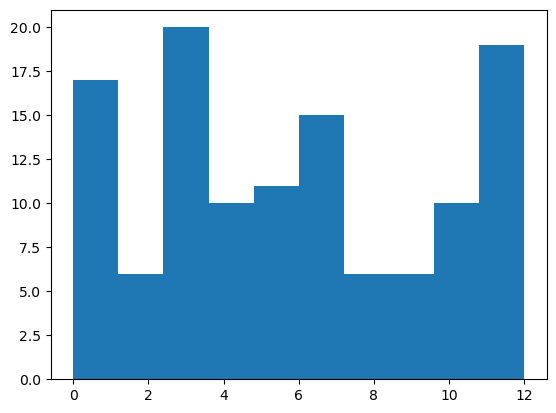

In [132]:
labels = gmm.predict(X)
plt.figure()
plt.hist(labels)

In [133]:
meanX = X.groupby(labels).mean()
meanX.columns


Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep disorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorexia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim'],
      dtype='object')

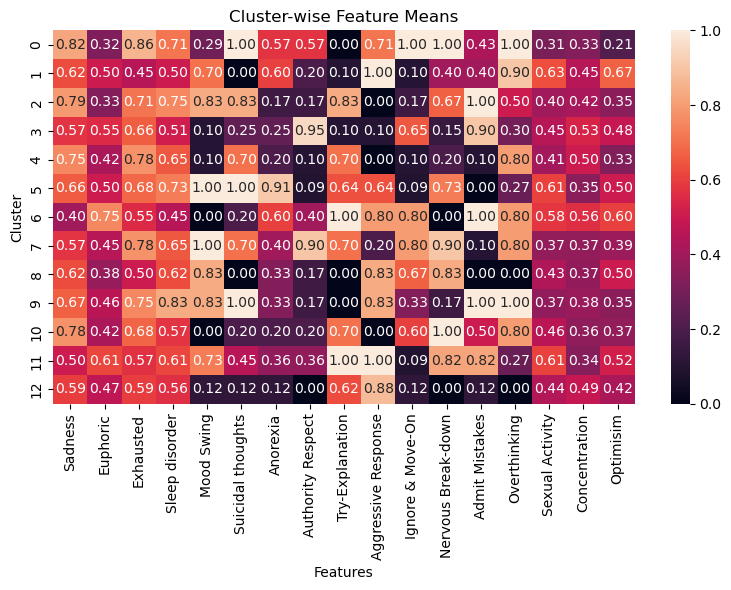

In [134]:
plt.figure(figsize=(8, 6))
sns.heatmap(meanX, annot=True, fmt=".2f")
plt.title("Cluster-wise Feature Means")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

In [135]:
z = pd.get_dummies(y)
z['clusters']= labels
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Bipolar Type-1  120 non-null    bool 
 1   Bipolar Type-2  120 non-null    bool 
 2   Depression      120 non-null    bool 
 3   Normal          120 non-null    bool 
 4   clusters        120 non-null    int64
dtypes: bool(4), int64(1)
memory usage: 1.5 KB


In [136]:
clusterlabels = z.groupby('clusters').mean()
df_long = clusterlabels.reset_index().melt(
    id_vars='clusters',
    var_name='feature',
    value_name='mean_value'
)
df_long.head()

,clusters,feature,mean_value
0,0,Bipolar Type-1,0.0
1,1,Bipolar Type-1,0.7
2,2,Bipolar Type-1,0.0
3,3,Bipolar Type-1,0.0
4,4,Bipolar Type-1,0.1


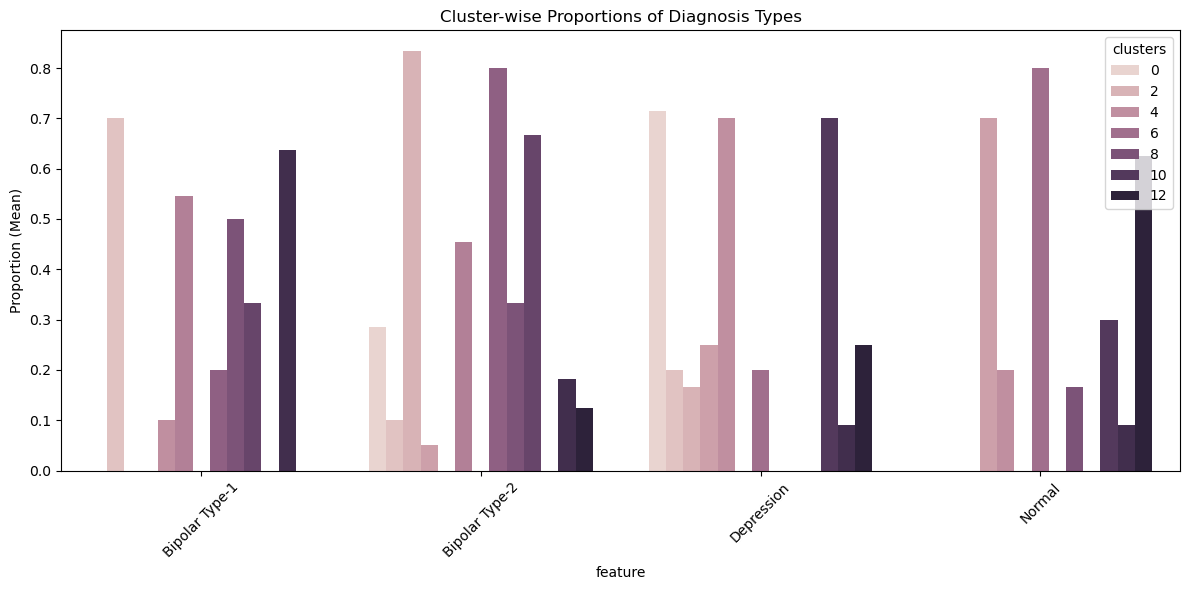

In [137]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_long,
    x='feature',
    y='mean_value',
    hue='clusters'
)

plt.xticks(rotation=45)
plt.ylabel("Proportion (Mean)")
plt.title("Cluster-wise Proportions of Diagnosis Types")
plt.tight_layout()
plt.show()